In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay,confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('creditcard.csv')

In [3]:
# 1. Data Exploration
print(df.head())
print(df.info())
print(df['Class'].value_counts())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
# 2. Data Preprocessing
X = df.drop('Class', axis=1)
y = df['Class']

In [5]:
# Normalize the features (Time and Amount) using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [7]:
# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

In [8]:
# 4. Train a Logistic Regression and Random Forest model
logreg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)

In [9]:
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [10]:
# 5. Model Evaluation
logreg_preds = logreg.predict(X_test)
rf_preds = rf.predict(X_test)


In [11]:
print("Logistic Regression Classification Report:\n", classification_report(y_test, logreg_preds))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_preds))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     85295
           1       0.97      0.92      0.95     85294

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [12]:
logreg_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
rf_roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])


In [13]:
print(f"Logistic Regression ROC-AUC: {logreg_roc_auc}")
print(f"Random Forest ROC-AUC: {rf_roc_auc}")

Logistic Regression ROC-AUC: 0.9897704675088612
Random Forest ROC-AUC: 0.9999996287362656


In [14]:
# Plot ROC Curves
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

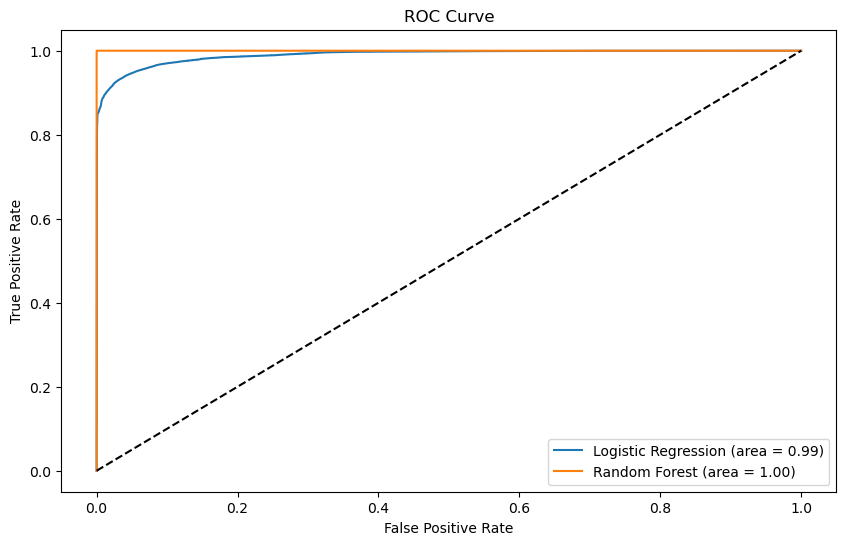

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(logreg_fpr, logreg_tpr, label=f'Logistic Regression (area = {logreg_roc_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (area = {rf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

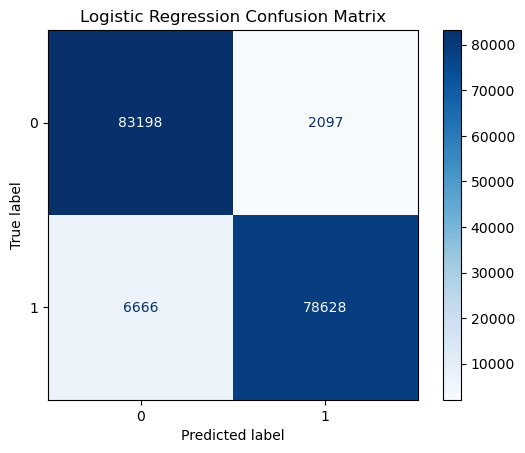

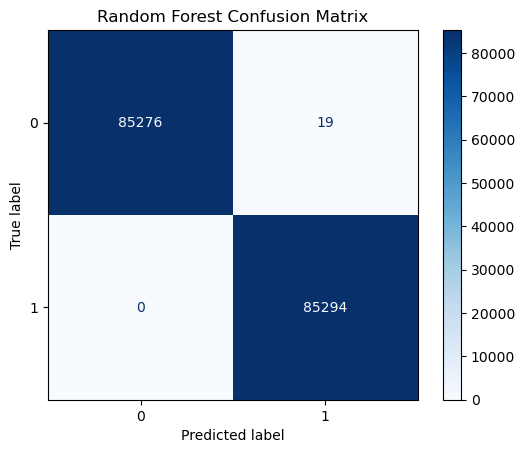

In [22]:
# Logistic Regression Confusion Matrix
logreg_cm = confusion_matrix(y_test, logreg_preds)
logreg_disp = ConfusionMatrixDisplay(confusion_matrix=logreg_cm, display_labels=[0, 1])
logreg_disp.plot(cmap=plt.cm.Blues)
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Random Forest Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_preds)
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=[0, 1])
rf_disp.plot(cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.show()